In [5]:
import pandas as pd												# data manipulation
import matplotlib.pyplot as plt											# graphs
import seaborn as sns												# graphs
import numpy as np												# graphs
from scipy.stats import norm											# statistics
from sklearn.preprocessing import StandardScaler								# statistics
from scipy import stats												# statistics
import warnings													# indicating warnings
warnings.filterwarnings('ignore')										# ignore by default
import sqlite3													# connect directly to MySQL
from bokeh.plotting import figure, output_file, show								# interactive charts
from bokeh.io import output_notebook										# interactive charts
output_notebook()	
from IPython.display import display

Loading BokehJS ...

In [12]:
df = pd.read_csv(r'C:\Users\milad\Desktop\df.csv')

In [9]:
df.describe()

,NAPS,Lat,Long,Date,H01,H02,H03,H04,H05,H06,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
count,224021.000000,224021.000000,224021.000000,2.240210e+05,207671.000000,201820.000000,202306.000000,193846.000000,206000.000000,208885.000000,...,209209.000000,210339.000000,210955.000000,211302.000000,211164.000000,211675.000000,211603.000000,211699.000000,211316.000000,211547.000000
mean,77161.753385,49.861821,-98.789832,2.018067e+07,11.715066,11.453725,11.119491,11.046127,10.898776,11.097456,...,14.776420,14.731778,14.597304,14.337025,13.961067,13.445721,12.962932,12.519475,12.159530,11.803622
std,28008.873991,5.087280,23.288946,3.449264e+02,14.197371,13.917178,13.691238,13.591520,13.560056,13.987336,...,17.094219,17.177318,17.172533,17.014036,16.571718,15.932007,15.323248,14.907546,14.566198,14.260804
min,10102.000000,42.292889,-135.058750,2.018010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60211.000000,45.641026,-119.477367,2.018040e+07,0.160000,0.160000,0.150000,0.150000,0.150000,0.170000,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.180000,0.170000
50%,90229.000000,49.215190,-111.500700,2.018070e+07,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,6.000000,6.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,5.000000,5.000000
75%,100126.000000,53.500100,-76.521130,2.018100e+07,21.000000,20.000000,20.000000,19.000000,19.000000,19.000000,...,29.000000,28.000000,28.000000,27.000000,26.000000,25.000000,24.000000,23.000000,22.000000,21.000000
max,129602.000000,82.450830,-52.711470,2.018123e+07,217.000000,169.000000,172.000000,167.000000,158.000000,195.000000,...,149.000000,147.000000,151.000000,155.000000,159.000000,159.000000,166.000000,153.000000,143.000000,139.000000


In [11]:
df2.head(2)

,Year,AP,NAPS,Mean
0,2018,CO,10102,0.172138
1,2018,CO,10401,0.157661


In [4]:
df = df.drop(columns=['P/T//P/T'])

In [5]:
df.rename(columns={'Pollutant//Polluant': 'AP', 'NAPS ID//Identifiant SNPA': 'NAPS', 'Latitude//Latitude': 'Lat',
                        'Longitude//Longitude': 'Long', 'Date//Date': 'Date', 'H01//H01': 'H01', 'H02//H02': 'H02'
                       , 'H03//H03': 'H03', 'H04//H04': 'H04', 'H05//H05': 'H05', 'H06//H06': 'H06', 'H07//H07': 'H07'
                       , 'H08//H08': 'H08', 'H09//H09': 'H09', 'H10//H10': 'H10', 'H11//H11': 'H11', 'H12//H12': 'H12'
                       , 'H13//H13': 'H13', 'H14//H14': 'H14', 'H15//H15': 'H15', 'H16//H16': 'H16', 'H17//H17': 'H17'
                       , 'H18//H18': 'H18', 'H19//H19': 'H19', 'H20//H20': 'H20', 'H21//H21': 'H21', 'H22//H22': 'H22'
                       , 'H23//H23': 'H23', 'H24//H24': 'H24'}, inplace=True)

In [204]:
df.columns = ['AP'] + df.columns.tolist()[1:]

In [8]:
df.at[ df.loc[df['H01'] == -999].index,'H01']= None
df.at[ df.loc[df['H02'] == -999].index,'H02']= None
df.at[ df.loc[df['H03'] == -999].index,'H03']= None
df.at[ df.loc[df['H04'] == -999].index,'H04']= None
df.at[ df.loc[df['H05'] == -999].index,'H05']= None
df.at[ df.loc[df['H06'] == -999].index,'H06']= None
df.at[ df.loc[df['H07'] == -999].index,'H07']= None
df.at[ df.loc[df['H08'] == -999].index,'H08']= None
df.at[ df.loc[df['H09'] == -999].index,'H09']= None
df.at[ df.loc[df['H10'] == -999].index,'H10']= None
df.at[ df.loc[df['H11'] == -999].index,'H11']= None
df.at[ df.loc[df['H12'] == -999].index,'H12']= None
df.at[ df.loc[df['H13'] == -999].index,'H13']= None
df.at[ df.loc[df['H14'] == -999].index,'H14']= None
df.at[ df.loc[df['H15'] == -999].index,'H15']= None
df.at[ df.loc[df['H16'] == -999].index,'H16']= None
df.at[ df.loc[df['H17'] == -999].index,'H17']= None
df.at[ df.loc[df['H18'] == -999].index,'H18']= None
df.at[ df.loc[df['H19'] == -999].index,'H19']= None
df.at[ df.loc[df['H20'] == -999].index,'H20']= None
df.at[ df.loc[df['H21'] == -999].index,'H21']= None
df.at[ df.loc[df['H22'] == -999].index,'H22']= None
df.at[ df.loc[df['H23'] == -999].index,'H23']= None
df.at[ df.loc[df['H24'] == -999].index,'H24']= None


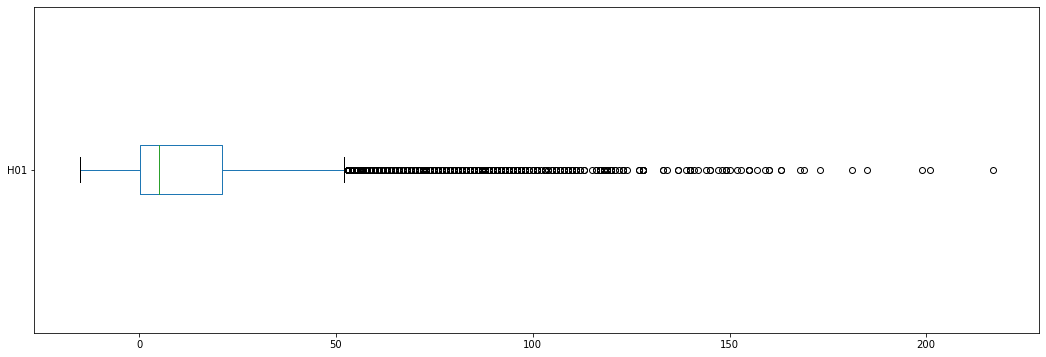

In [336]:
df['H01'].plot(kind='box', vert=False, figsize=(18,6))

In [370]:
df.sort_values(by = 'H01' )[:10]

,AP,NAPS,Lat,Long,Date,H01,H02,H03,H04,H05,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
224020,SO2,129601,60.004550,-111.893241,20181231,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
193051,SO2,90229,50.955122,-113.969742,20180214,0.0,NaN,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193049,SO2,90229,50.955122,-113.969742,20180212,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0
193048,SO2,90229,50.955122,-113.969742,20180211,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193047,SO2,90229,50.955122,-113.969742,20180210,0.0,NaN,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
193046,SO2,90229,50.955122,-113.969742,20180209,0.0,NaN,0.0,0.0,0.0,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
193045,SO2,90229,50.955122,-113.969742,20180208,0.0,NaN,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
193044,SO2,90229,50.955122,-113.969742,20180207,0.0,NaN,0.0,0.0,0.0,...,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
193042,SO2,90229,50.955122,-113.969742,20180205,0.0,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
193041,SO2,90229,50.955122,-113.969742,20180204,0.0,NaN,0.0,1.0,1.0,...,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [331]:
df.drop(df.sort_values(by = 'H01', ascending = False)[:23].index, inplace=True)
df.drop(df.sort_values(by = 'H02', ascending = False)[:8].index, inplace=True)
df.drop(df.sort_values(by = 'H03', ascending = False)[:8].index, inplace=True)
df.drop(df.sort_values(by = 'H04', ascending = False)[:14].index, inplace=True)
df.drop(df.sort_values(by = 'H05', ascending = False)[:17].index, inplace=True)
df.drop(df.sort_values(by = 'H06', ascending = False)[:9].index, inplace=True)
df.drop(df.sort_values(by = 'H07', ascending = False)[:15].index, inplace=True)
df.drop(df.sort_values(by = 'H08', ascending = False)[:14].index, inplace=True)
df.drop(df.sort_values(by = 'H09', ascending = False)[:14].index, inplace=True)
df.drop(df.sort_values(by = 'H10', ascending = False)[:23].index, inplace=True)
df.drop(df.sort_values(by = 'H11', ascending = False)[:17].index, inplace=True)
df.drop(df.sort_values(by = 'H12', ascending = False)[:14].index, inplace=True)
df.drop(df.sort_values(by = 'H13', ascending = False)[:27].index, inplace=True)
df.drop(df.sort_values(by = 'H14', ascending = False)[:18].index, inplace=True)
df.drop(df.sort_values(by = 'H15', ascending = False)[:15].index, inplace=True)
df.drop(df.sort_values(by = 'H16', ascending = False)[:13].index, inplace=True)
df.drop(df.sort_values(by = 'H17', ascending = False)[:15].index, inplace=True)
df.drop(df.sort_values(by = 'H18', ascending = False)[:16].index, inplace=True)
df.drop(df.sort_values(by = 'H19', ascending = False)[:20].index, inplace=True)
df.drop(df.sort_values(by = 'H20', ascending = False)[:20].index, inplace=True)
df.drop(df.sort_values(by = 'H21', ascending = False)[:21].index, inplace=True)
df.drop(df.sort_values(by = 'H22', ascending = False)[:17].index, inplace=True)
df.drop(df.sort_values(by = 'H23', ascending = False)[:21].index, inplace=True)
df.drop(df.sort_values(by = 'H24', ascending = False)[:20].index, inplace=True)



# edited_df2

In [357]:
df.drop(df.loc[df['H01'] < 0] .index, inplace=True)
df.drop(df.loc[df['H02'] < 0] .index, inplace=True)
df.drop(df.loc[df['H03'] < 0] .index, inplace=True)
df.drop(df.loc[df['H04'] < 0] .index, inplace=True)
df.drop(df.loc[df['H05'] < 0] .index, inplace=True)
df.drop(df.loc[df['H06'] < 0] .index, inplace=True)
df.drop(df.loc[df['H07'] < 0] .index, inplace=True)
df.drop(df.loc[df['H08'] < 0] .index, inplace=True)
df.drop(df.loc[df['H09'] < 0] .index, inplace=True)
df.drop(df.loc[df['H10'] < 0] .index, inplace=True)
df.drop(df.loc[df['H11'] < 0] .index, inplace=True)
df.drop(df.loc[df['H12'] < 0] .index, inplace=True)
df.drop(df.loc[df['H13'] < 0] .index, inplace=True)
df.drop(df.loc[df['H14'] < 0] .index, inplace=True)
df.drop(df.loc[df['H15'] < 0] .index, inplace=True)
df.drop(df.loc[df['H16'] < 0] .index, inplace=True)
df.drop(df.loc[df['H17'] < 0] .index, inplace=True)
df.drop(df.loc[df['H18'] < 0] .index, inplace=True)
df.drop(df.loc[df['H19'] < 0] .index, inplace=True)
df.drop(df.loc[df['H20'] < 0] .index, inplace=True)
df.drop(df.loc[df['H21'] < 0] .index, inplace=True)
df.drop(df.loc[df['H22'] < 0] .index, inplace=True)
df.drop(df.loc[df['H23'] < 0] .index, inplace=True)
df.drop(df.loc[df['H24'] < 0] .index, inplace=True)

# edited_df3

In [14]:
df.replace({'AP': {'NOX': 'NOx'}}, inplace=True)

In [15]:
df2 = pd.DataFrame({
                    'AP': [ 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',	 'CO',
                             'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',	 'NOx',
                             'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',	 'O3',
                             'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',	 'PM10',
                             'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',	 'SO2',
],
                    'NAPS': ['010102',	'010401',	'010501',	'010601',	'010602',	'010801',	'010901',	'011002',	'020104',	'020301',	'020401',	'030113',	'030118',	'030120',	'030201',	'030310',	'030502',	'030701',	'030901',	'031101',	'040104',	'040203',	'040207',	'040208',	'040209',	'040302',	'040701',	'040901',	'041201',	'041302',	'041501',	'050103',	'050109',	'050113',	'050119',	'050122',	'050126',	'050128',	'050129',	'050133',	'050134',	'050135',	'050136',	'050137',	'050138',	'050204',	'050308',	'050310',	'050311',	'050404',	'050504',	'050604',	'050803',	'050902',	'051501',	'052001',	'052201',	'052301',	'052401',	'052801',	'053201',	'053301',	'053501',	'053601',	'053701',	'053801',	'053901',	'054201',	'054401',	'054901',	'055001',	'055101',	'055301',	'055502',	'055702',	'060104',	'060106',	'060204',	'060211',	'060304',	'060410',	'060430',	'060433',	'060434',	'060435',	'060438',	'060440',	'060450',	'060512',	'060513',	'060515',	'060610',	'060709',	'060809',	'060904',	'061007',	'061009',	'061104',	'061201',	'061302',	'061402',	'061502',	'061603',	'061702',	'061703',	'061802',	'062001',	'062501',	'062601',	'063001',	'063301',	'063701',	'064001',	'064101',	'064401',	'065001',	'065101',	'065201',	'065301',	'065401',	'065801',	'065901',	'066101',	'066201',	'070118',	'070119',	'070203',	'070301',	'070501',	'080111',	'080211',	'080402',	'080502',	'081001',	'082001',	'082002',	'082101',	'090120',	'090121',	'090130',	'090133',	'090134',	'090135',	'090136',	'090222',	'090229',	'090230',	'090235',	'090250',	'090302',	'090304',	'090402',	'090502',	'090601',	'090602',	'090603',	'090607',	'090608',	'090609',	'090701',	'090702',	'090801',	'090802',	'090805',	'090806',	'090807',	'090808',	'091101',	'091301',	'091401',	'091501',	'091601',	'091701',	'091801',	'091901',	'092001',	'092201',	'092601',	'092901',	'093001',	'093101',	'093202',	'093801',	'093901',	'094001',	'094202',	'094301',	'094401',	'094500',	'094601',	'100103',	'100110',	'100111',	'100112',	'100119',	'100121',	'100125',	'100126',	'100127',	'100128',	'100132',	'100134',	'100135',	'100136',	'100137',	'100138',	'100140',	'100141',	'100143',	'100202',	'100304',	'100308',	'100318',	'100401',	'100701',	'101003',	'101005',	'101101',	'101202',	'101301',	'101401',	'101501',	'101603',	'101701',	'102001',	'102102',	'102201',	'102210',	'102220',	'102230',	'102302',	'102303',	'102401',	'102503',	'102701',	'103202',	'103502',	'103602',	'103704',	'103901',	'103904',	'103905',	'104003',	'104301',	'104302',	'104303',	'104803',	'104804',	'105001',	'105101',	'105201',	'105301',	'105504',	'106702',	'107100',	'119004',	'129003',	'129102',	'129203',	'129303',	'129401',	'129501',	'129601',	'129602',
                            '010102',	'010401',	'010501',	'010601',	'010602',	'010801',	'010901',	'011002',	'020104',	'020301',	'020401',	'030113',	'030118',	'030120',	'030201',	'030310',	'030502',	'030701',	'030901',	'031101',	'040104',	'040203',	'040207',	'040208',	'040209',	'040302',	'040701',	'040901',	'041201',	'041302',	'041501',	'050103',	'050109',	'050113',	'050119',	'050122',	'050126',	'050128',	'050129',	'050133',	'050134',	'050135',	'050136',	'050137',	'050138',	'050204',	'050308',	'050310',	'050311',	'050404',	'050504',	'050604',	'050803',	'050902',	'051501',	'052001',	'052201',	'052301',	'052401',	'052801',	'053201',	'053301',	'053501',	'053601',	'053701',	'053801',	'053901',	'054201',	'054401',	'054901',	'055001',	'055101',	'055301',	'055502',	'055702',	'060104',	'060106',	'060204',	'060211',	'060304',	'060410',	'060430',	'060433',	'060434',	'060435',	'060438',	'060440',	'060450',	'060512',	'060513',	'060515',	'060610',	'060709',	'060809',	'060904',	'061007',	'061009',	'061104',	'061201',	'061302',	'061402',	'061502',	'061603',	'061702',	'061703',	'061802',	'062001',	'062501',	'062601',	'063001',	'063301',	'063701',	'064001',	'064101',	'064401',	'065001',	'065101',	'065201',	'065301',	'065401',	'065801',	'065901',	'066101',	'066201',	'070118',	'070119',	'070203',	'070301',	'070501',	'080111',	'080211',	'080402',	'080502',	'081001',	'082001',	'082002',	'082101',	'090120',	'090121',	'090130',	'090133',	'090134',	'090135',	'090136',	'090222',	'090229',	'090230',	'090235',	'090250',	'090302',	'090304',	'090402',	'090502',	'090601',	'090602',	'090603',	'090607',	'090608',	'090609',	'090701',	'090702',	'090801',	'090802',	'090805',	'090806',	'090807',	'090808',	'091101',	'091301',	'091401',	'091501',	'091601',	'091701',	'091801',	'091901',	'092001',	'092201',	'092601',	'092901',	'093001',	'093101',	'093202',	'093801',	'093901',	'094001',	'094202',	'094301',	'094401',	'094500',	'094601',	'100103',	'100110',	'100111',	'100112',	'100119',	'100121',	'100125',	'100126',	'100127',	'100128',	'100132',	'100134',	'100135',	'100136',	'100137',	'100138',	'100140',	'100141',	'100143',	'100202',	'100304',	'100308',	'100318',	'100401',	'100701',	'101003',	'101005',	'101101',	'101202',	'101301',	'101401',	'101501',	'101603',	'101701',	'102001',	'102102',	'102201',	'102210',	'102220',	'102230',	'102302',	'102303',	'102401',	'102503',	'102701',	'103202',	'103502',	'103602',	'103704',	'103901',	'103904',	'103905',	'104003',	'104301',	'104302',	'104303',	'104803',	'104804',	'105001',	'105101',	'105201',	'105301',	'105504',	'106702',	'107100',	'119004',	'129003',	'129102',	'129203',	'129303',	'129401',	'129501',	'129601',	'129602',
                            '010102',	'010401',	'010501',	'010601',	'010602',	'010801',	'010901',	'011002',	'020104',	'020301',	'020401',	'030113',	'030118',	'030120',	'030201',	'030310',	'030502',	'030701',	'030901',	'031101',	'040104',	'040203',	'040207',	'040208',	'040209',	'040302',	'040701',	'040901',	'041201',	'041302',	'041501',	'050103',	'050109',	'050113',	'050119',	'050122',	'050126',	'050128',	'050129',	'050133',	'050134',	'050135',	'050136',	'050137',	'050138',	'050204',	'050308',	'050310',	'050311',	'050404',	'050504',	'050604',	'050803',	'050902',	'051501',	'052001',	'052201',	'052301',	'052401',	'052801',	'053201',	'053301',	'053501',	'053601',	'053701',	'053801',	'053901',	'054201',	'054401',	'054901',	'055001',	'055101',	'055301',	'055502',	'055702',	'060104',	'060106',	'060204',	'060211',	'060304',	'060410',	'060430',	'060433',	'060434',	'060435',	'060438',	'060440',	'060450',	'060512',	'060513',	'060515',	'060610',	'060709',	'060809',	'060904',	'061007',	'061009',	'061104',	'061201',	'061302',	'061402',	'061502',	'061603',	'061702',	'061703',	'061802',	'062001',	'062501',	'062601',	'063001',	'063301',	'063701',	'064001',	'064101',	'064401',	'065001',	'065101',	'065201',	'065301',	'065401',	'065801',	'065901',	'066101',	'066201',	'070118',	'070119',	'070203',	'070301',	'070501',	'080111',	'080211',	'080402',	'080502',	'081001',	'082001',	'082002',	'082101',	'090120',	'090121',	'090130',	'090133',	'090134',	'090135',	'090136',	'090222',	'090229',	'090230',	'090235',	'090250',	'090302',	'090304',	'090402',	'090502',	'090601',	'090602',	'090603',	'090607',	'090608',	'090609',	'090701',	'090702',	'090801',	'090802',	'090805',	'090806',	'090807',	'090808',	'091101',	'091301',	'091401',	'091501',	'091601',	'091701',	'091801',	'091901',	'092001',	'092201',	'092601',	'092901',	'093001',	'093101',	'093202',	'093801',	'093901',	'094001',	'094202',	'094301',	'094401',	'094500',	'094601',	'100103',	'100110',	'100111',	'100112',	'100119',	'100121',	'100125',	'100126',	'100127',	'100128',	'100132',	'100134',	'100135',	'100136',	'100137',	'100138',	'100140',	'100141',	'100143',	'100202',	'100304',	'100308',	'100318',	'100401',	'100701',	'101003',	'101005',	'101101',	'101202',	'101301',	'101401',	'101501',	'101603',	'101701',	'102001',	'102102',	'102201',	'102210',	'102220',	'102230',	'102302',	'102303',	'102401',	'102503',	'102701',	'103202',	'103502',	'103602',	'103704',	'103901',	'103904',	'103905',	'104003',	'104301',	'104302',	'104303',	'104803',	'104804',	'105001',	'105101',	'105201',	'105301',	'105504',	'106702',	'107100',	'119004',	'129003',	'129102',	'129203',	'129303',	'129401',	'129501',	'129601',	'129602',
                            '010102',	'010401',	'010501',	'010601',	'010602',	'010801',	'010901',	'011002',	'020104',	'020301',	'020401',	'030113',	'030118',	'030120',	'030201',	'030310',	'030502',	'030701',	'030901',	'031101',	'040104',	'040203',	'040207',	'040208',	'040209',	'040302',	'040701',	'040901',	'041201',	'041302',	'041501',	'050103',	'050109',	'050113',	'050119',	'050122',	'050126',	'050128',	'050129',	'050133',	'050134',	'050135',	'050136',	'050137',	'050138',	'050204',	'050308',	'050310',	'050311',	'050404',	'050504',	'050604',	'050803',	'050902',	'051501',	'052001',	'052201',	'052301',	'052401',	'052801',	'053201',	'053301',	'053501',	'053601',	'053701',	'053801',	'053901',	'054201',	'054401',	'054901',	'055001',	'055101',	'055301',	'055502',	'055702',	'060104',	'060106',	'060204',	'060211',	'060304',	'060410',	'060430',	'060433',	'060434',	'060435',	'060438',	'060440',	'060450',	'060512',	'060513',	'060515',	'060610',	'060709',	'060809',	'060904',	'061007',	'061009',	'061104',	'061201',	'061302',	'061402',	'061502',	'061603',	'061702',	'061703',	'061802',	'062001',	'062501',	'062601',	'063001',	'063301',	'063701',	'064001',	'064101',	'064401',	'065001',	'065101',	'065201',	'065301',	'065401',	'065801',	'065901',	'066101',	'066201',	'070118',	'070119',	'070203',	'070301',	'070501',	'080111',	'080211',	'080402',	'080502',	'081001',	'082001',	'082002',	'082101',	'090120',	'090121',	'090130',	'090133',	'090134',	'090135',	'090136',	'090222',	'090229',	'090230',	'090235',	'090250',	'090302',	'090304',	'090402',	'090502',	'090601',	'090602',	'090603',	'090607',	'090608',	'090609',	'090701',	'090702',	'090801',	'090802',	'090805',	'090806',	'090807',	'090808',	'091101',	'091301',	'091401',	'091501',	'091601',	'091701',	'091801',	'091901',	'092001',	'092201',	'092601',	'092901',	'093001',	'093101',	'093202',	'093801',	'093901',	'094001',	'094202',	'094301',	'094401',	'094500',	'094601',	'100103',	'100110',	'100111',	'100112',	'100119',	'100121',	'100125',	'100126',	'100127',	'100128',	'100132',	'100134',	'100135',	'100136',	'100137',	'100138',	'100140',	'100141',	'100143',	'100202',	'100304',	'100308',	'100318',	'100401',	'100701',	'101003',	'101005',	'101101',	'101202',	'101301',	'101401',	'101501',	'101603',	'101701',	'102001',	'102102',	'102201',	'102210',	'102220',	'102230',	'102302',	'102303',	'102401',	'102503',	'102701',	'103202',	'103502',	'103602',	'103704',	'103901',	'103904',	'103905',	'104003',	'104301',	'104302',	'104303',	'104803',	'104804',	'105001',	'105101',	'105201',	'105301',	'105504',	'106702',	'107100',	'119004',	'129003',	'129102',	'129203',	'129303',	'129401',	'129501',	'129601',	'129602',
                            '010102',	'010401',	'010501',	'010601',	'010602',	'010801',	'010901',	'011002',	'020104',	'020301',	'020401',	'030113',	'030118',	'030120',	'030201',	'030310',	'030502',	'030701',	'030901',	'031101',	'040104',	'040203',	'040207',	'040208',	'040209',	'040302',	'040701',	'040901',	'041201',	'041302',	'041501',	'050103',	'050109',	'050113',	'050119',	'050122',	'050126',	'050128',	'050129',	'050133',	'050134',	'050135',	'050136',	'050137',	'050138',	'050204',	'050308',	'050310',	'050311',	'050404',	'050504',	'050604',	'050803',	'050902',	'051501',	'052001',	'052201',	'052301',	'052401',	'052801',	'053201',	'053301',	'053501',	'053601',	'053701',	'053801',	'053901',	'054201',	'054401',	'054901',	'055001',	'055101',	'055301',	'055502',	'055702',	'060104',	'060106',	'060204',	'060211',	'060304',	'060410',	'060430',	'060433',	'060434',	'060435',	'060438',	'060440',	'060450',	'060512',	'060513',	'060515',	'060610',	'060709',	'060809',	'060904',	'061007',	'061009',	'061104',	'061201',	'061302',	'061402',	'061502',	'061603',	'061702',	'061703',	'061802',	'062001',	'062501',	'062601',	'063001',	'063301',	'063701',	'064001',	'064101',	'064401',	'065001',	'065101',	'065201',	'065301',	'065401',	'065801',	'065901',	'066101',	'066201',	'070118',	'070119',	'070203',	'070301',	'070501',	'080111',	'080211',	'080402',	'080502',	'081001',	'082001',	'082002',	'082101',	'090120',	'090121',	'090130',	'090133',	'090134',	'090135',	'090136',	'090222',	'090229',	'090230',	'090235',	'090250',	'090302',	'090304',	'090402',	'090502',	'090601',	'090602',	'090603',	'090607',	'090608',	'090609',	'090701',	'090702',	'090801',	'090802',	'090805',	'090806',	'090807',	'090808',	'091101',	'091301',	'091401',	'091501',	'091601',	'091701',	'091801',	'091901',	'092001',	'092201',	'092601',	'092901',	'093001',	'093101',	'093202',	'093801',	'093901',	'094001',	'094202',	'094301',	'094401',	'094500',	'094601',	'100103',	'100110',	'100111',	'100112',	'100119',	'100121',	'100125',	'100126',	'100127',	'100128',	'100132',	'100134',	'100135',	'100136',	'100137',	'100138',	'100140',	'100141',	'100143',	'100202',	'100304',	'100308',	'100318',	'100401',	'100701',	'101003',	'101005',	'101101',	'101202',	'101301',	'101401',	'101501',	'101603',	'101701',	'102001',	'102102',	'102201',	'102210',	'102220',	'102230',	'102302',	'102303',	'102401',	'102503',	'102701',	'103202',	'103502',	'103602',	'103704',	'103901',	'103904',	'103905',	'104003',	'104301',	'104302',	'104303',	'104803',	'104804',	'105001',	'105101',	'105201',	'105301',	'105504',	'106702',	'107100',	'119004',	'129003',	'129102',	'129203',	'129303',	'129401',	'129501',	'129601',	'129602',
]
}, columns=['Year', 'AP', 'NAPS'])
df2['Year'] = 2018
df2

,Year,AP,NAPS
0,2018,CO,010102
1,2018,CO,010401
2,2018,CO,010501
3,2018,CO,010601
4,2018,CO,010602
...,...,...,...
1315,2018,SO2,129303
1316,2018,SO2,129401
1317,2018,SO2,129501
1318,2018,SO2,129601


In [16]:
df2['Mean'] = pd.Series([1], index=[0])         # Just to create a column. Otherwise, the last line will throw an error
for index in range(0,df2['NAPS'].shape[0]):
    AP = df2['AP'][index]
    NAPS = int(df2['NAPS'][index])
    filter = df.loc[(df['AP'] == AP) & (df['NAPS'] == NAPS)]
    Mean = filter.iloc[:, 5:29].sum().sum()/(24*filter.shape[0])
    df2['Mean'][index] = pd.Series([Mean], index=[index])

In [17]:
df2.head(5)

,Year,AP,NAPS,Mean
0,2018,CO,010102,0.172138
1,2018,CO,010401,0.157661
2,2018,CO,010501,0.132001
3,2018,CO,010601,NaN
4,2018,CO,010602,0.077430


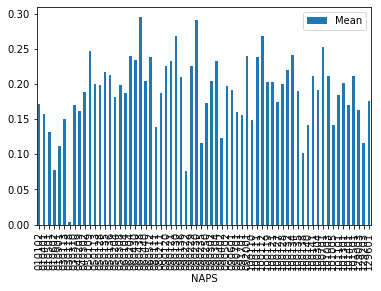

In [448]:
df2.loc[(df2['AP'] == 'CO') & (df2['Mean'] >= 0)].plot(kind='bar', x='NAPS', y='Mean')

In [21]:
df.to_csv('df.csv', index=None)
df2.to_csv('df2.csv', index=None)

# Finish!